In [1]:
dataset_dir = '/kaggle/input/diamos-plant-dataset/Pear/leaves'

In [2]:
import os

def get_folder_names_and_counts(dataset_dir):
    folder_info = {}
    
    all_items = os.listdir(dataset_dir)
    
    for item in all_items:
        item_path = os.path.join(dataset_dir, item)
        if os.path.isdir(item_path):
            num_items = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
            folder_info[item] = num_items
    
    return folder_info


folder_info = get_folder_names_and_counts(dataset_dir)

print("Folder names and item counts in the dataset directory:")
for folder, count in folder_info.items():
    print(f"{folder}: {count} items")

Folder names and item counts in the dataset directory:
curl: 65 items
healthy: 43 items
spot: 1768 items
slug: 4050 items


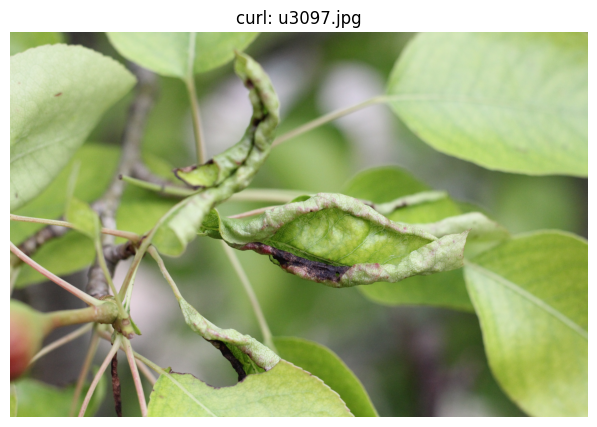

In [3]:
import random
import cv2
import matplotlib.pyplot as plt

def get_folder_images(dataset_dir):
    folder_images = {}
    
    # Traverse the dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            images = [f for f in os.listdir(dir_path) if f.endswith(('.jpg', '.png'))]  # Adjust extensions as needed
            folder_images[dir_name] = images
            
    return folder_images

def select_and_display_random_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"Warning: Couldn't read the image {img_path}. Skipping...")
                continue

            # Convert from BGR (OpenCV format) to RGB (Matplotlib format)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.imshow(image_rgb)
            plt.title(f"{folder}: {selected_image}")
            plt.axis('off')
            plt.show()
            break


# Select and display a random image from each folder
select_and_display_random_images(dataset_dir)


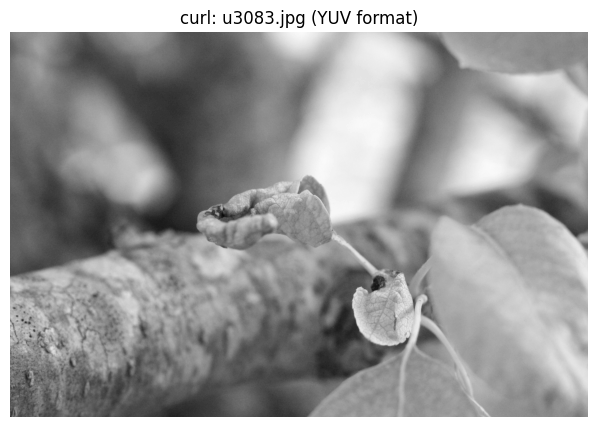

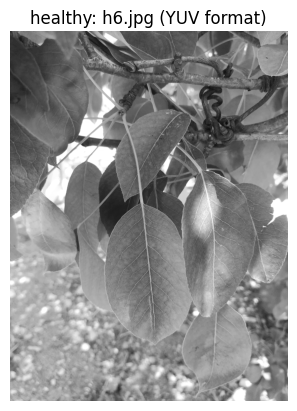

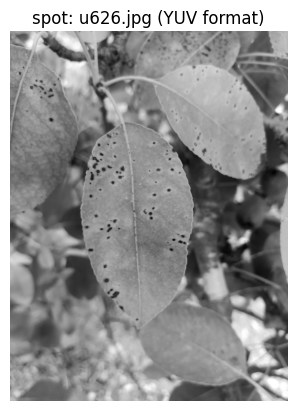

In [4]:
def select_and_display_random_yuv_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected YUV image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"Warning: Couldn't read the image {img_path}. Skipping...")
                continue

            # Convert the image from BGR to YUV format
            yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

            # Display the YUV image (for visualization, we display the Y channel)
            plt.imshow(yuv_image[:,:,0], cmap='gray')
            plt.title(f"{folder}: {selected_image} (YUV format)")
            plt.axis('off')
            plt.show()
            
select_and_display_random_yuv_images(dataset_dir)

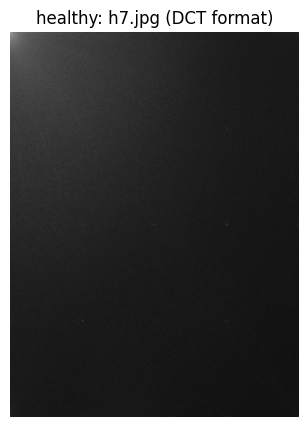

In [5]:
import numpy as np
def get_folder_images(dataset_dir):
    folder_images = {}
    
    # Traverse the dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            images = [f for f in os.listdir(dir_path) if f.endswith(('.jpg', '.png'))]  # Adjust extensions as needed
            folder_images[dir_name] = images
            
    return folder_images

def apply_dct(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply DCT
    dct_image = cv2.dct(np.float32(gray_image) / 255.0)
    
    # Take the logarithm to enhance the visibility of the DCT coefficients
    dct_image_log = np.log(np.abs(dct_image) + 1e-3)
    
    # Normalize the DCT image for display
    dct_image_normalized = cv2.normalize(dct_image_log, None, 0, 255, cv2.NORM_MINMAX)
    dct_image_uint8 = np.uint8(dct_image_normalized)
    
    return dct_image_uint8

def select_and_display_random_dct_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected DCT image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"Warning: Couldn't read the image {img_path}. Skipping...")
                continue

            # Apply DCT to the image
            dct_image = apply_dct(image)

            # Display the DCT image
            plt.imshow(dct_image, cmap='gray')
            plt.title(f"{folder}: {selected_image} (DCT format)")
            plt.axis('off')
            plt.show()
            break
            
select_and_display_random_dct_images(dataset_dir)

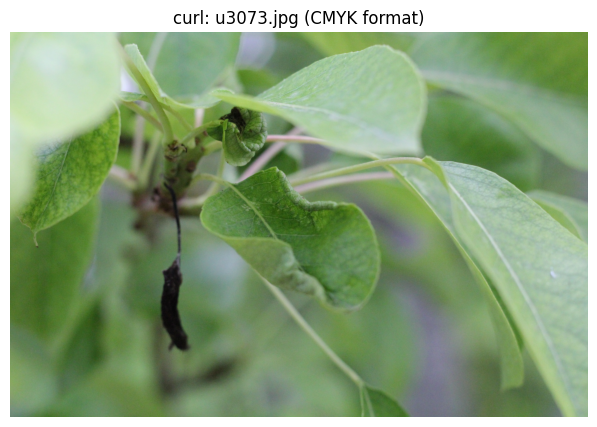

In [6]:
from PIL import Image


def convert_to_cmyk(image_path):
    # Open the image using PIL
    image = Image.open(image_path)
    
    # Convert the image to CMYK
    cmyk_image = image.convert('CMYK')
    
    # Convert CMYK image to numpy array
    cmyk_array = np.array(cmyk_image)
    
    return cmyk_array

def select_and_display_random_cmyk_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected CMYK image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            
            # Convert the image to CMYK
            cmyk_image = convert_to_cmyk(img_path)
            
            # Normalize the CMYK channels for display
            cmyk_image_normalized = cmyk_image.astype(np.float32) / 255.0
            
            # Create an empty RGB image
            rgb_image = np.ones(cmyk_image_normalized.shape[:2] + (3,), dtype=np.float32)
            
            # Convert CMYK to RGB for display
            K = cmyk_image_normalized[:, :, 3]
            R = (1.0 - (cmyk_image_normalized[:, :, 0] * (1.0 - K) + K))
            G = (1.0 - (cmyk_image_normalized[:, :, 1] * (1.0 - K) + K))
            B = (1.0 - (cmyk_image_normalized[:, :, 2] * (1.0 - K) + K))
            
            rgb_image[:, :, 0] = R
            rgb_image[:, :, 1] = G
            rgb_image[:, :, 2] = B
            
            # Clip the values to be in the valid range [0, 1]
            rgb_image = np.clip(rgb_image, 0.0, 1.0)
            
            # Convert to uint8
            rgb_image_uint8 = (rgb_image * 255).astype(np.uint8)
            
            # Display the CMYK image
            plt.imshow(rgb_image_uint8)
            plt.title(f"{folder}: {selected_image} (CMYK format)")
            plt.axis('off')
            plt.show()
            break
            
select_and_display_random_cmyk_images(dataset_dir)

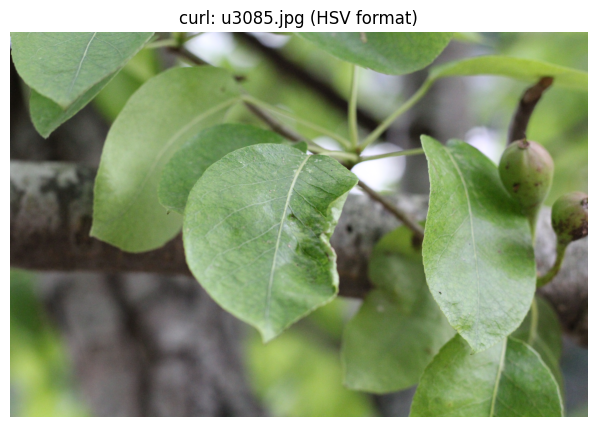

In [7]:


def convert_to_hsv(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert the image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    return hsv_image

def select_and_display_random_hsv_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected HSV image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            
            # Convert the image to HSV
            hsv_image = convert_to_hsv(img_path)
            
            # Convert HSV image to RGB for display
            rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
            
            # Display the HSV image
            plt.imshow(rgb_image)
            plt.title(f"{folder}: {selected_image} (HSV format)")
            plt.axis('off')
            plt.show()
            break
            
select_and_display_random_hsv_images(dataset_dir)

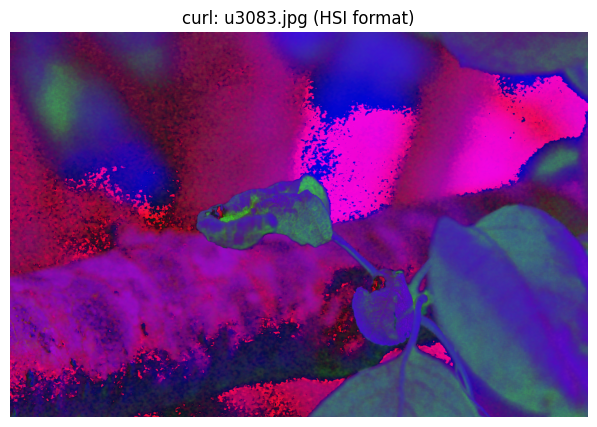

In [8]:
def rgb_to_hsi(image):
    # Separate the RGB channels
    B, G, R = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    B = B.astype(np.float32) / 255.0
    G = G.astype(np.float32) / 255.0
    R = R.astype(np.float32) / 255.0
    
    # Calculate Intensity
    I = (R + G + B) / 3.0
    
    # Calculate Saturation
    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 * min_rgb / (R + G + B + 1e-6))
    
    # Calculate Hue
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G) ** 2 + (R - B) * (G - B))
    theta = np.arccos(numerator / (denominator + 1e-6))
    H = np.zeros_like(R)
    H[B <= G] = theta[B <= G]
    H[B > G] = 2 * np.pi - theta[B > G]
    H = H / (2 * np.pi)
    
    # Stack the HSI channels
    HSI = np.stack((H, S, I), axis=-1)
    
    return HSI

def select_and_display_random_hsi_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected HSI image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"Warning: Couldn't read the image {img_path}. Skipping...")
                continue

            # Convert the image to HSI
            hsi_image = rgb_to_hsi(image)
            
            # Normalize the HSI image for display
            hsi_image_normalized = (hsi_image * 255).astype(np.uint8)
            
            # Display the HSI image
            plt.imshow(hsi_image_normalized)
            plt.title(f"{folder}: {selected_image} (HSI format)")
            plt.axis('off')
            plt.show()
            break

            
select_and_display_random_hsi_images(dataset_dir)

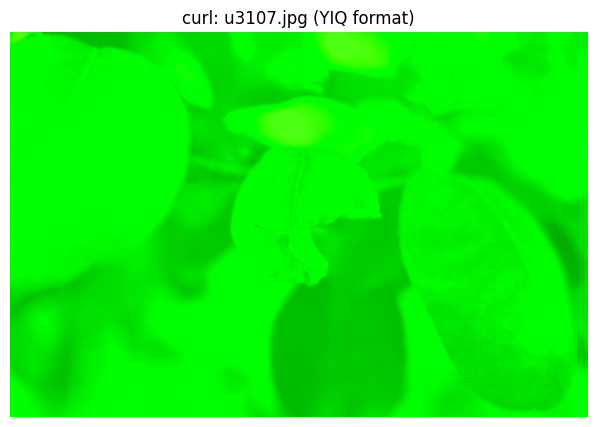

In [9]:
def rgb_to_yiq(image):
    # Convert image to float32 for calculations
    image_float = image.astype(np.float32) / 255.0
    
    # Conversion matrix
    yiq_matrix = np.array([[0.299, 0.587, 0.114],
                           [0.596, -0.274, -0.322],
                           [0.211, -0.523, 0.312]])
    
    # Perform the conversion
    yiq_image = np.dot(image_float, yiq_matrix.T)
    
    # Clip values to valid range
    yiq_image = np.clip(yiq_image, 0.0, 1.0)
    
    return yiq_image

def select_and_display_random_yiq_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected YIQ image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"Warning: Couldn't read the image {img_path}. Skipping...")
                continue

            # Convert the image to YIQ
            yiq_image = rgb_to_yiq(image)
            
            # Convert YIQ image to RGB for display
            rgb_image = cv2.cvtColor((yiq_image * 255).astype(np.uint8), cv2.COLOR_YCrCb2RGB)
            
            # Display the YIQ image
            plt.imshow(rgb_image)
            plt.title(f"{folder}: {selected_image} (YIQ format)")
            plt.axis('off')
            plt.show()
            break
            
select_and_display_random_yiq_images(dataset_dir)

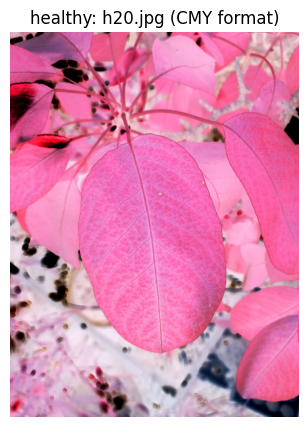

In [10]:
def rgb_to_cmy(image):
    # Subtract each pixel's RGB values from white (255, 255, 255)
    cmy_image = 255 - image
    
    return cmy_image

def select_and_display_random_cmy_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected CMY image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"Warning: Couldn't read the image {img_path}. Skipping...")
                continue

            # Convert the image to CMY
            cmy_image = rgb_to_cmy(image)
            
            # Display the CMY image
            plt.imshow(cmy_image)
            plt.title(f"{folder}: {selected_image} (CMY format)")
            plt.axis('off')
            plt.show()
            break
            
select_and_display_random_cmy_images(dataset_dir)

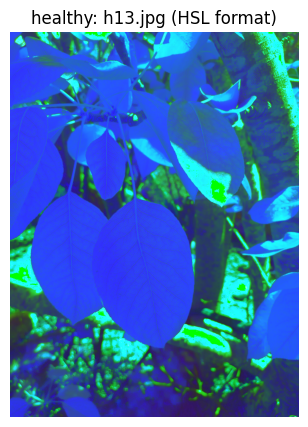

In [11]:
def select_and_display_random_hsl_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected HSL image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"Warning: Couldn't read the image {img_path}. Skipping...")
                continue

            # Convert the image to HSL
            hsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
            
            # Display the HSL image
            plt.imshow(hsl_image)
            plt.title(f"{folder}: {selected_image} (HSL format)")
            plt.axis('off')
            plt.show()
            break
            
select_and_display_random_hsl_images(dataset_dir)

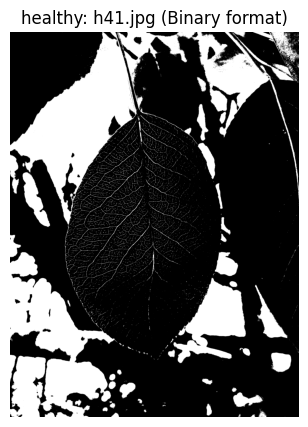

In [12]:
def rgb_to_binary(image, threshold=127):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    
    return binary_image

def select_and_display_random_binary_images(dataset_dir):
    folder_images = get_folder_images(dataset_dir)
    
    # Display the randomly selected binary image from each folder
    plt.figure(figsize=(15, 5))
    
    for folder, images in folder_images.items():
        if images:  # Check if the folder is not empty
            # Randomly select one image
            selected_image = random.choice(images)
            img_path = os.path.join(dataset_dir, folder, selected_image)
            
            # Read the image using OpenCV
            image = cv2.imread(img_path)
            
            if image is None:
                print(f"Warning: Couldn't read the image {img_path}. Skipping...")
                continue

            # Convert the image to binary
            binary_image = rgb_to_binary(image)
            
            # Display the binary image
            plt.imshow(binary_image, cmap='gray')
            plt.title(f"{folder}: {selected_image} (Binary format)")
            plt.axis('off')
            plt.show()
            break
select_and_display_random_binary_images(dataset_dir)